In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Load the dataset
df =pd.read_pickle('/Users/ajithkhan/Downloads/Data Science /LMS/Machine Learning/10th July Session Materials/titanic_clean_updated2.pkl')
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone
0,0,3,Mr.,male,22.00000,1,0,7.2500,S,1,False
1,1,1,Mrs.,female,38.00000,1,0,71.2833,C,1,False
2,1,3,Miss.,female,26.00000,0,0,7.9250,S,0,True
3,1,1,Mrs.,female,35.00000,1,0,53.1000,S,1,False
4,0,3,Mr.,male,35.00000,0,0,8.0500,S,0,True
5,0,3,Mr.,male,25.14062,0,0,8.4583,Q,0,True
6,0,1,Mr.,male,54.00000,0,0,51.8625,S,0,True
7,0,3,Master.,male,2.00000,3,1,21.0750,S,4,False
8,1,3,Mrs.,female,27.00000,0,2,11.1333,S,2,False
9,1,2,Mrs.,female,14.00000,1,0,30.0708,C,1,False


In [4]:
#Getting some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    category
 1   Pclass      891 non-null    category
 2   Name        891 non-null    object  
 3   Sex         891 non-null    category
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    category
 9   Group_size  891 non-null    int64   
 10  Alone       891 non-null    bool    
dtypes: bool(1), category(4), float64(2), int64(3), object(1)
memory usage: 46.3+ KB


In [5]:
#Checking for nulls
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Group_size    0
Alone         0
dtype: int64

In [6]:
#Adding 1 t the Group_size column i.e Adding the ticket owner
df['Group_size'] = df['Group_size']+1
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone
0,0,3,Mr.,male,22.0,1,0,7.2500,S,2,False
1,1,1,Mrs.,female,38.0,1,0,71.2833,C,2,False
2,1,3,Miss.,female,26.0,0,0,7.9250,S,1,True
3,1,1,Mrs.,female,35.0,1,0,53.1000,S,2,False
4,0,3,Mr.,male,35.0,0,0,8.0500,S,1,True


In [7]:
#Changing the types of the features
df['Name'] = df['Name'].astype('category')
df['Alone'] = df['Alone'].astype('int')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone
0,0,3,Mr.,male,22.0,1,0,7.2500,S,2,0
1,1,1,Mrs.,female,38.0,1,0,71.2833,C,2,0
2,1,3,Miss.,female,26.0,0,0,7.9250,S,1,1
3,1,1,Mrs.,female,35.0,1,0,53.1000,S,2,0
4,0,3,Mr.,male,35.0,0,0,8.0500,S,1,1


In [8]:
#Crosscheck 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    category
 1   Pclass      891 non-null    category
 2   Name        891 non-null    category
 3   Sex         891 non-null    category
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    category
 9   Group_size  891 non-null    int64   
 10  Alone       891 non-null    int64   
dtypes: category(5), float64(2), int64(4)
memory usage: 46.5 KB


In [9]:
#Lets deal the categorical columns
df['Sex'].unique()

['male', 'female']
Categories (2, object): ['female', 'male']

In [10]:
#LabelEncoder Techniques
from sklearn.preprocessing import LabelEncoder

In [11]:
#Dealing the 'Sex" column - Male is 1 and Female is 0
LE_sex = LabelEncoder()
LE_sex.fit(df['Sex'])
df.Sex = LE_sex.transform(df['Sex'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone
0,0,3,Mr.,1,22.0,1,0,7.2500,S,2,0
1,1,1,Mrs.,0,38.0,1,0,71.2833,C,2,0
2,1,3,Miss.,0,26.0,0,0,7.9250,S,1,1
3,1,1,Mrs.,0,35.0,1,0,53.1000,S,2,0
4,0,3,Mr.,1,35.0,0,0,8.0500,S,1,1


In [12]:
#Lets try dummy method for Embarked column
emb = pd.get_dummies(df['Embarked'], prefix_sep='_', prefix = 'Emb')
emb.head()

,Emb_C,Emb_Q,Emb_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [13]:
#Now conacate the Dummies
df = pd.concat([df,emb], axis =1)
df 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Group_size,Alone,Emb_C,Emb_Q,Emb_S
0,0,3,Mr.,1,22.00000,1,0,7.2500,S,2,0,0,0,1
1,1,1,Mrs.,0,38.00000,1,0,71.2833,C,2,0,1,0,0
2,1,3,Miss.,0,26.00000,0,0,7.9250,S,1,1,0,0,1
3,1,1,Mrs.,0,35.00000,1,0,53.1000,S,2,0,0,0,1
4,0,3,Mr.,1,35.00000,0,0,8.0500,S,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,Others,1,27.00000,0,0,13.0000,S,1,1,0,0,1
887,1,1,Miss.,0,19.00000,0,0,30.0000,S,1,1,0,0,1
888,0,3,Miss.,0,25.14062,1,2,23.4500,S,4,0,0,0,1
889,1,1,Mr.,1,26.00000,0,0,30.0000,C,1,1,1,0,0


In [14]:
#Lets get rid of Embarked column
df = df.drop(['Embarked'], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S
0,0,3,Mr.,1,22.0,1,0,7.2500,2,0,0,0,1
1,1,1,Mrs.,0,38.0,1,0,71.2833,2,0,1,0,0
2,1,3,Miss.,0,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,Mrs.,0,35.0,1,0,53.1000,2,0,0,0,1
4,0,3,Mr.,1,35.0,0,0,8.0500,1,1,0,0,1


In [15]:
#Time for the Name column 
titles = pd.get_dummies(df['Name'], prefix_sep='_' , prefix = 'Titles')
titles.head()

,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [16]:
#Concat and drop the Name 
df = pd.concat([df,titles], axis =1)
df = df.drop(['Name'], axis =1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others
0,0,3,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,1,0,0
1,1,1,0,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,0,0,0,1,0,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1,0,0


In [17]:
#Doing the same for Pclass coolumn
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,1,0,0,0,1
1,1,0,38.0,1,0,71.2833,2,0,1,0,0,0,0,0,1,0,0,0
2,1,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,2,0,0,0,1,0,0,0,1,0,0,0
4,0,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1,0,0,0,1


In [18]:
#Final dataframe distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
Age,891.0,29.292875,13.210527,0.42,22.0000,26.0000,37.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Group_size,891.0,1.904602,1.613459,1.00,1.0000,1.0000,2.0,11.0000
Alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000
Emb_C,891.0,0.188552,0.391372,0.00,0.0000,0.0000,0.0,1.0000
Emb_Q,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.0,1.0000
Emb_S,891.0,0.725028,0.446751,0.00,0.0000,1.0000,1.0,1.0000


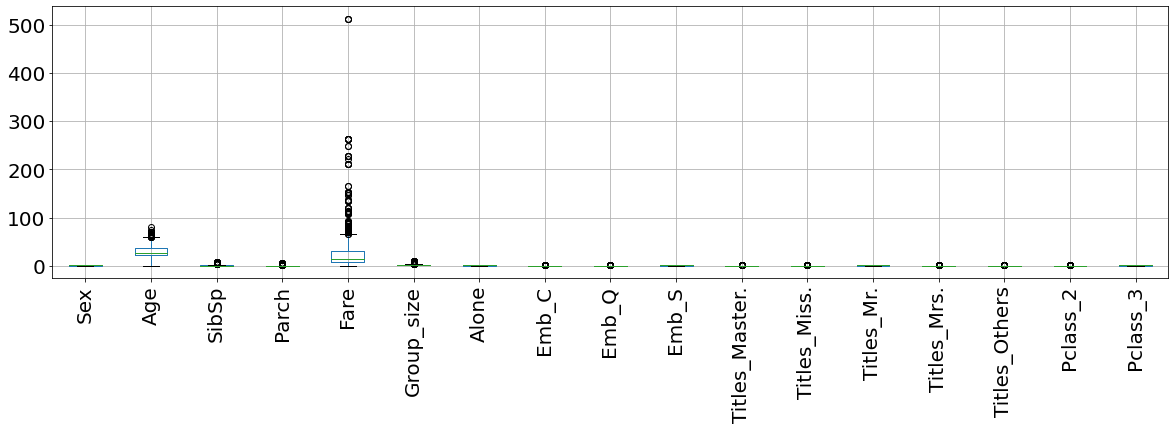

In [19]:
#Lets check for Outliers 
df.boxplot(
    by=None,
    ax=None,
    fontsize=20,
    rot=90,
    grid=True,
    figsize=(20,5),
    layout=None,
    return_type=None,
    backend=None,);

#### Looks like Age,SibSp and Fare have more Outliers

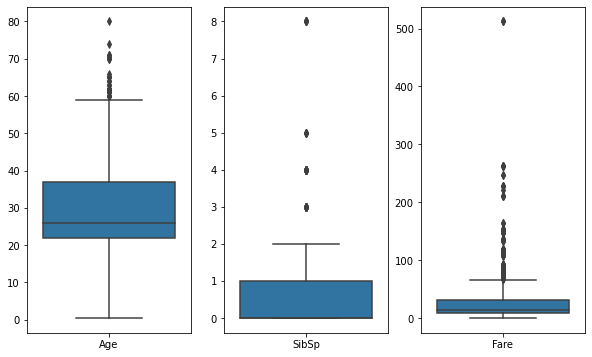

In [20]:
#Lets view them alone 
fig,axis= plt.subplots(nrows = 1,ncols= 3, figsize = (10,6))
sns.boxplot(data = df[['Age']], ax=axis[0]);
sns.boxplot(data = df[['SibSp']], ax=axis[1]);
sns.boxplot(data = df[['Fare']], ax=axis[2]);

In [21]:
#Clipping Outliers using IQR technique for Age 
lb = 22 - 1.5*(37-22)
ub = 37 + 1.5*(37-22)
lb, ub

(-0.5, 59.5)

In [22]:
#Lets define a function for outliers
def remove_outlier(age):
    if age<lb:
        return lb
    elif age>ub:
        return ub
    else:
        return age

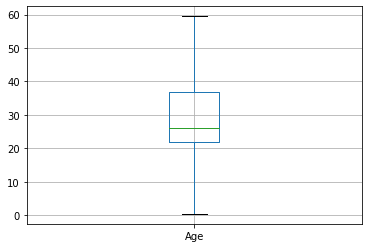

In [23]:
#Applying in Age column
df.Age = df.Age.apply(remove_outlier)
df.boxplot(['Age']);

(0.42, 59.5)

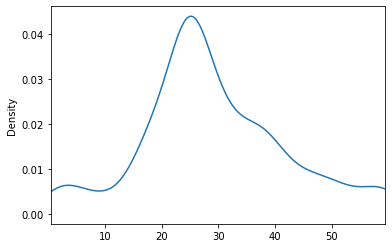

In [24]:
#Lets see the distribution 
df.Age.plot.kde();
plt.xlim(df.Age.min(), df.Age.max())

#### Looks good !

(0.0, 512.3292)

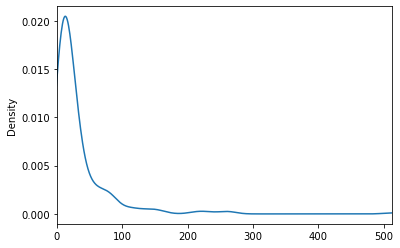

In [25]:
#Lets do the same for Fare column
df.Fare.plot.kde();
plt.xlim(df.Fare.min(), df.Fare.max())

In [26]:
lb1 = 7.9104 - 1.5*(31-7.9104)
ub1 = 31 + 1.5*(31-7.9104)
lb1, ub1

(-26.724, 65.6344)

In [27]:
def remove_outlier(fare):
    if fare<lb1:
        return lb1
    elif fare>ub1:
        return ub1
    else:
        return fare

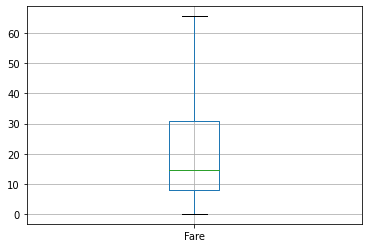

In [28]:
df.Fare = df.Fare.apply(remove_outlier)
df.boxplot(['Fare']);

(0.0, 65.6344)

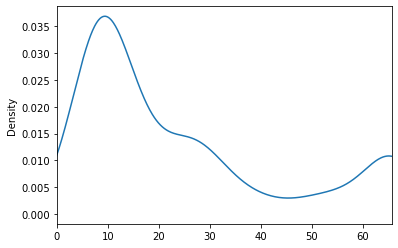

In [29]:
df.Fare.plot.kde();
plt.xlim(df.Fare.min(), df.Fare.max())

#### Looks good too!

## Lets build a Model

In [30]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Group_size,Alone,Emb_C,Emb_Q,Emb_S,Titles_Master.,Titles_Miss.,Titles_Mr.,Titles_Mrs.,Titles_Others,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,2,0,0,0,1,0,0,1,0,0,0,1
1,1,0,38.0,1,0,65.6344,2,0,1,0,0,0,0,0,1,0,0,0
2,1,0,26.0,0,0,7.9250,1,1,0,0,1,0,1,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,2,0,0,0,1,0,0,0,1,0,0,0
4,0,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1,0,0,0,1


In [31]:
X= df.drop(['Survived'], axis =1)
y = df['Survived']
X.shape , y.shape

((891, 17), (891,))

In [32]:
#Lets split for Train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((623, 17), (268, 17))

In [33]:
#Lets try Logistic Regression 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [34]:
#Intercepts and Co efficients 
LR.intercept_ , LR.coef_

(array([1.14811682]),
 array([[-1.22984181, -0.01865356, -0.63383494, -0.46345626,  0.02768623,
          0.05082562, -0.12515681,  0.6933482 ,  0.42020389,  0.03456473,
          1.68303058,  0.24558206, -1.19344724,  1.06510014, -0.65214872,
          0.17341443, -0.81546728]]))

In [35]:
coeff = pd.DataFrame(np.array(LR.coef_).reshape(-1,1), index=X.columns, columns = ['LR_Coeff'])
coeff

,LR_Coeff
Sex,-1.229842
Age,-0.018654
SibSp,-0.633835
Parch,-0.463456
Fare,0.027686
Group_size,0.050826
Alone,-0.125157
Emb_C,0.693348
Emb_Q,0.420204
Emb_S,0.034565


In [36]:
#Accuracy 
LR.score(X_test, y_test)

0.8283582089552238

In [37]:
#Prediction 
y_pred = LR.predict(X_test)
y_pred[:20]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [38]:
#Lets compare 
res = pd.DataFrame(y_test)
res['Predicted'] = y_pred
res.head(10)

,Survived,Predicted
709,1,1
439,0,0
840,0,0
720,1,1
39,1,1
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


In [39]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
confusion_matrix(y_test, y_pred)

array([[138,  19],
       [ 27,  84]])

In [40]:
#Accuracy from confusion matrix
accu = (138+84)/(138+19+27+84)
accu

0.8283582089552238

In [41]:
#Lets try model model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [42]:
#Lets create a list of model which we are going to try 
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [43]:
# Traning all the 5 models & testing them ONCE !!!
scores = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    names.append(name)
    score = model.score(X_test, y_test)
    scores.append(score)
    print(name,':', score)

LR : 0.8283582089552238
KNN : 0.7350746268656716
CART : 0.7686567164179104
NB : 0.7985074626865671
SVM : 0.6940298507462687


/Users/ajithkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [45]:
#Cross validating the base model 
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [46]:
scores1 = []
names1 = []
for name , model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
    cv_result = cross_val_score(model, X,y, cv=kfold, scoring = 'accuracy')
    names1.append(name)
    scores1.append(cv_result)

/Users/ajithkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ajithkhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [47]:
scores1

[array([0.79329609, 0.82022472, 0.80337079, 0.85393258, 0.83707865]),
 array([0.74860335, 0.76966292, 0.7247191 , 0.67977528, 0.66292135]),
 array([0.78212291, 0.75842697, 0.79213483, 0.76966292, 0.7752809 ]),
 array([0.78212291, 0.79775281, 0.79213483, 0.83146067, 0.83707865]),
 array([0.77653631, 0.70224719, 0.68539326, 0.67977528, 0.67977528])]

In [48]:
names1

['LR', 'KNN', 'CART', 'NB', 'SVM']

In [49]:
results_df = pd.DataFrame(scores1, index=names1, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:5].mean(axis=1) *100
results_df['CV Std Dev'] = results_df.iloc[:,0:5].std(axis=1) *100
results_df

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LR,0.793296,0.820225,0.803371,0.853933,0.837079,82.158057,2.459822
KNN,0.748603,0.769663,0.724719,0.679775,0.662921,71.713640,4.511604
CART,0.782123,0.758427,0.792135,0.769663,0.775281,77.552570,1.271009
NB,0.782123,0.797753,0.792135,0.831461,0.837079,80.810997,2.460815
SVM,0.776536,0.702247,0.685393,0.679775,0.679775,70.474546,4.117552


#### This is the cross validating of base model. It looks like the data is linear in nature and hence the linear model have higher accuracy. 

In [50]:
#Lets do the Hyper - Paramter tuning (Standard scaler) through a pipeline and cross validate 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
#Lets create a pipeline 
pipeline = []
pipeline.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipeline.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipeline.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipeline.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipeline.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [52]:
scores2 = []
names2 = []
for name , model in pipeline:
    kfold1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
    cv_result1 = cross_val_score(model, X,y, cv=kfold1, scoring = 'accuracy')
    names2.append(name)
    scores2.append(cv_result1)

In [53]:
results_df1 = pd.DataFrame(scores2, index=names2, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df1['CV Mean'] = results_df1.iloc[:,0:5].mean(axis=1) *100
results_df1['CV Std Dev'] = results_df1.iloc[:,0:5].std(axis=1) *100

In [54]:
results_df

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LR,0.793296,0.820225,0.803371,0.853933,0.837079,82.158057,2.459822
KNN,0.748603,0.769663,0.724719,0.679775,0.662921,71.713640,4.511604
CART,0.782123,0.758427,0.792135,0.769663,0.775281,77.552570,1.271009
NB,0.782123,0.797753,0.792135,0.831461,0.837079,80.810997,2.460815
SVM,0.776536,0.702247,0.685393,0.679775,0.679775,70.474546,4.117552


In [55]:
results_df1

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLR,0.793296,0.837079,0.797753,0.848315,0.842697,82.382776,2.618832
ScaledKNN,0.787709,0.837079,0.786517,0.820225,0.820225,81.035089,2.230500
ScaledCART,0.782123,0.758427,0.803371,0.764045,0.797753,78.114368,1.987009
ScaledNB,0.782123,0.797753,0.792135,0.831461,0.837079,80.810997,2.460815
ScaledSVM,0.798883,0.831461,0.792135,0.842697,0.853933,82.382148,2.714450


#### Looks like KNN, and SVM were the huge beneficery from Scaling. LR and CART were not affected by scaling 

In [56]:
#Lets try MinMaxScaler through the same pipeline process
from sklearn.preprocessing import MinMaxScaler
pipeline1 = []
pipeline1.append(('MScaledLR', Pipeline([('Scaler', MinMaxScaler()), ('LR', LogisticRegression())])))
pipeline1.append(('MScaledKNN', Pipeline([('Scaler', MinMaxScaler()), ('KNN', KNeighborsClassifier())])))
pipeline1.append(('MScaledCART', Pipeline([('Scaler', MinMaxScaler()), ('CART', DecisionTreeClassifier())])))
pipeline1.append(('MScaledNB', Pipeline([('Scaler', MinMaxScaler()), ('NB', GaussianNB())])))
pipeline1.append(('MScaledSVM', Pipeline([('Scaler', MinMaxScaler()), ('SVM', SVC())])))

scores3 = []
names3 = []
for name , model in pipeline:
    kfold2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
    cv_result2 = cross_val_score(model, X,y, cv=kfold2, scoring = 'accuracy')
    names3.append(name)
    scores3.append(cv_result2)

results_df2 = pd.DataFrame(scores3, index=names3, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df2['CV Mean'] = results_df2.iloc[:,0:5].mean(axis=1) *100
results_df2['CV Std Dev'] = results_df2.iloc[:,0:5].std(axis=1) *100

#### Lets compare all the Result-dataframes

In [57]:
results_df #Baseline model

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LR,0.793296,0.820225,0.803371,0.853933,0.837079,82.158057,2.459822
KNN,0.748603,0.769663,0.724719,0.679775,0.662921,71.713640,4.511604
CART,0.782123,0.758427,0.792135,0.769663,0.775281,77.552570,1.271009
NB,0.782123,0.797753,0.792135,0.831461,0.837079,80.810997,2.460815
SVM,0.776536,0.702247,0.685393,0.679775,0.679775,70.474546,4.117552


In [58]:
results_df1 #StandardScaling 

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLR,0.793296,0.837079,0.797753,0.848315,0.842697,82.382776,2.618832
ScaledKNN,0.787709,0.837079,0.786517,0.820225,0.820225,81.035089,2.230500
ScaledCART,0.782123,0.758427,0.803371,0.764045,0.797753,78.114368,1.987009
ScaledNB,0.782123,0.797753,0.792135,0.831461,0.837079,80.810997,2.460815
ScaledSVM,0.798883,0.831461,0.792135,0.842697,0.853933,82.382148,2.714450


In [59]:
results_df2 #MinMaxScaling

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLR,0.793296,0.837079,0.797753,0.848315,0.842697,82.382776,2.618832
ScaledKNN,0.787709,0.837079,0.786517,0.820225,0.820225,81.035089,2.230500
ScaledCART,0.782123,0.764045,0.775281,0.775281,0.775281,77.440211,0.650381
ScaledNB,0.782123,0.797753,0.792135,0.831461,0.837079,80.810997,2.460815
ScaledSVM,0.798883,0.831461,0.792135,0.842697,0.853933,82.382148,2.714450


### CONCLUSION

#### The data is very linear in nature 
#### Scaling improve the accuracy of KNN and SVM models 
#### MinMax and Standard scaler doesnt vary much 
#### The best model were Logistics Regression Classifier and SVM Classifier 

In [ ]:
#Lets try tuning SVM 
from sklearn.model_selection import GridSearchCV
c_values = [0.1, 0.5, 1.0, 2.0]
kernel_values = ['linear', 'poly', 'rbf']
degree_values = [2,3]
gamma_values =[0.1, 1, 2]

param_grid = dict(C=c_values, kernel = kernel_values, degree = degree_values, gamma = gamma_values)

kfoldSVM = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=kfoldSVM, )
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))